In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
digits = datasets.load_digits()

In [3]:
X = digits.data      # feature matrix (64 pixels per image)
y = digits.target    # labels (0–9)

In [4]:
print("Dataset shape:", X.shape)
print("Target classes:", set(y))

Dataset shape: (1797, 64)
Target classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


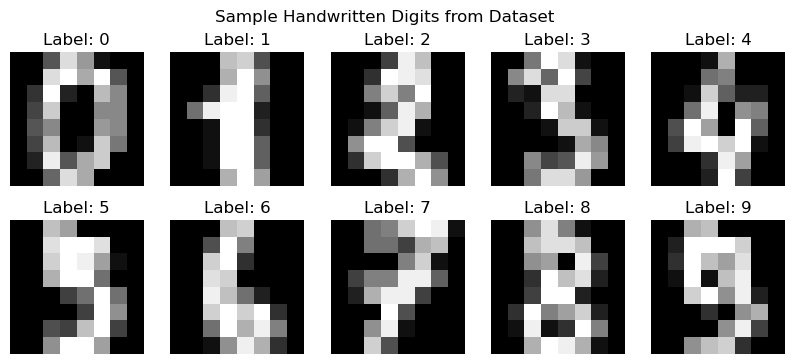

In [5]:
# Visualize few images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.suptitle("Sample Handwritten Digits from Dataset")
plt.show()

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# Feature Scaling (SVM works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train SVM Classifier
svm_clf = SVC(kernel="rbf", C=10, gamma=0.001)   # tuned parameters
svm_clf.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001)

In [9]:
# Step 6: Predictions
y_pred = svm_clf.predict(X_test_scaled)

In [10]:
# Evaluation
print("\n--- SVM Classification Report ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


--- SVM Classification Report ---
Accuracy: 0.9888888888888889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



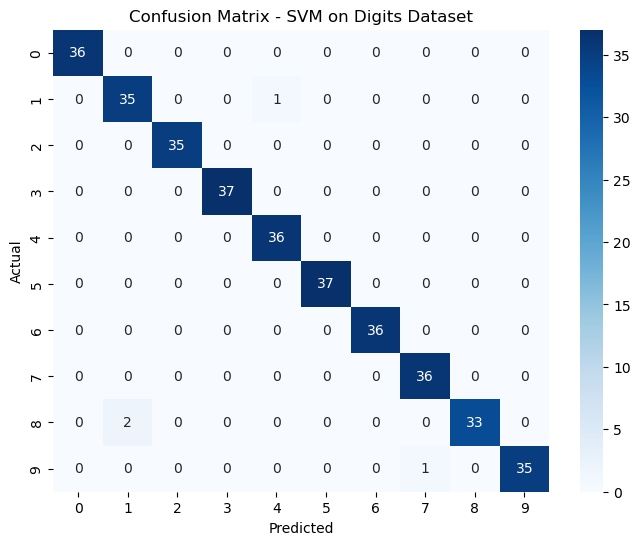

In [11]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM on Digits Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

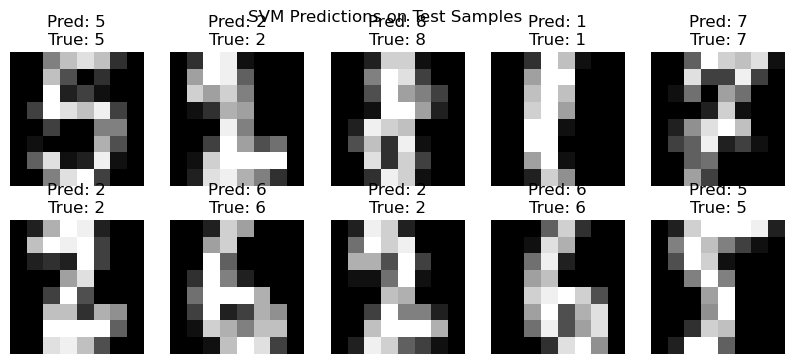

In [12]:
# Visualize Some Predictions
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap="gray")
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis("off")
plt.suptitle("SVM Predictions on Test Samples")
plt.show()
